<a href="https://colab.research.google.com/github/otselen01/DataScience/blob/main/ProyectoFinal_Omar_Donadio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo: ¿Cómo podemos predecir la incidencia de enfermedad celíaca a partir de la existencia de síntomas del paciente?

##Abstract

La enfermedad celiaca es una enfermedad autoinmune donde se generan autoanticuerpos contra la proteína del gluten. En los últimos años, y mayormente en argentina, el diagnostico es cada vez mas frecuente (1% del total de los adultos) y mas precoz debido a los métodos diagnósticos mas sensibles y más específicos, así como al mayor conocimiento de la enfermedad.

Hipótesis:

La hipótesis que se plantea es que, al contar esta enfermedad con alta carga genética y ser una patología de origen autoinmune, podríamos predecir el diagnostico de enfermedad celiaca basándonos en la edad, el género, la coexistencia de otra enfermedad autoinmune (diabetes tipo I), la presencia o no de síntomas típicos y los niveles de anticuerpos.

Para lograrlo se usará un dataset sobre pacientes con sospecha de enfermedad celiaca, entre 1 y 35 años, y se aplicaran distintos métodos gráficos (histograma, grafico de torta, de barra y de dispersión), así como también el uso de regresiones lineales multivariadas, para evaluar la relación entre las variables.

Como resultado del análisis exploratorio, se observa una mayor incidencia de enfermedad celíaca en los pacientes que inician con sintomas tipicos durante la infancia, sobre todo aquellos que presentan simultanamente diabetes tipo I. No se logra el mismo resultado sin embargo al cotejar por genero. Siendo la enfermedad celiaca una enfermedad autoinmune se esperaria una frecuencia mayor en mujeres, pero no se observa esta tendencia. Tampoco se hallan resultados significativos para predecir enfermedad celiaca al evaluar de forma especifica las caracteristicas de la diarrea. La presencia de anticuerpos positivos sigue siendo de gran importancia para predecir la enfermedad, aunque su sensibilidad no es del 100% y no se observa una relacion directa entre el nivel de anticuerpos y la gravedad de la enfermedad celiaca (MARSH).

Motivación:

Lo que motiva ciertamente es la mejora en la calidad de vida del paciente. El objetivo principal es lograr la predicción de la enfermedad celíaca para evitar que los pacientes se sometan a estudios invasivos, como la endoscopia alta y su respectiva biopsia, con el fin de determinar si padecen la enfermedad. Asimismo, se persigue la detección temprana de la enfermedad, lo que posibilitaría un diagnóstico oportuno y proporcionaría oportunidades para implementar medidas y mejorar la gestión de la enfermedad desde sus etapas iniciales.

Audiencia:

La audiencia destinataria de este análisis de datos es diversa y variada. En primer lugar, el trabajo será de gran interés para los profesionales y expertos de la salud, ya que podrán obtener una comprensión más profunda de los factores y variables que son más influyentes en la determinación de la enfermedad celíaca. Además, estudiantes, investigadores también se beneficiarán al acceder a este análisis, ya que podrán utilizarlo como base para investigaciones adicionales y como referencia para futuros proyectos.

Conclusiones:

Luego de estos análisis, y dada la gran cantidad de variables categoricas en este dataset, se plantea la necesidad de utilizar arboles de decisión para la clasificación y predicción de la enfermedad celíaca.

La exactitud del 95.47% obtenida por el modelo de machine learning en el dataset de prueba es un indicador alentador que demuestra la eficacia y el potencial del algoritmo utilizado para determinar si una persona es celiaca.

Los resultados obtenidos muestran una prometedora capacidad del modelo de machine learning para detectar la enfermedad celíaca con una exactitud del 95.47%. Este avance de estas técnicas podrían llegar a tener un impacto significativo en el ámbito médico, lo que potencialmente mejoraría la calidad de vida y el bienestar de quienes podrían estar afectados por esta enfermedad.





##Contexto comercial

Hoy en día con los números crecientes de casos detectados y la mayor información sobre la enfermedad celíaca, se evidencia un sobrediagnostico inicial, tanto por parte del paciente como del médico. Una mejor prediccion de la enfermedad basada en los sintomas concretos del paciente podría ayudar a disminuir los gastos en análisis innecesarios y el riesgo de los pacientes sometidos a estudios invasivos.


##Problema comercial

Desarrollar un modelo predictivo utilizando datos de síntomas y otros factores relevantes para determinar la probabilidad de que un paciente tenga enfermedad celíaca pudiendo así evitar procedimientos innecesarios.

##Contexto analítico

Este dataset se obtuvo originalmente del Departamento de Biotecnología de la Universidad de Wageningen y la Investigación.
El objetivo del conjunto de datos es predecir de manera diagnóstica si un paciente tiene o no enfermedad celíaca, basándose en ciertas mediciones diagnósticas incluidas en el conjunto de datos. Este conjunto de datos consta de características que se pueden utilizar para predecir el alto riesgo de enfermedad celíaca.
Los conjuntos de datos consisten en varias variables médicas como edad, género, tipo de diabetes, etc., y una variable objetivo. El conjunto de datos consta de 2206 filas y 15 columnas.

Fuente: https://www.kaggle.com/datasets/jackwin07/celiac-disease-coeliac-disease


## EDA (Exploratory Data Analysis)


### Importación de librerías


In [29]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



### Importación dataset


Descripcion de variables relevantes

* Age: Edad de los pacientes incluidos en el estudio (1-35 años)
* Gender: género de los pacientes incluidos en el estudio (male/female)
* Diabetes: diabetes (yes/no)
* Diabetes Type: tipo de diabetes, (none/Type 1/Type 2)
* Diarrhoea: tipo de diarrea (inflammatory/fatty/watery)
* Abdominal: dolor abdominal (yes/no)
* Short_Stature: estatura (PPS/DSS/variant)
* PPS: Proportionate short stature
* DSS: Disproportionate short stature
* variante: Variant restricted growth
* Sticky_Stool: heces pegajosas (yes/no)
* Weight_loss: perdida de peso (yes/no)
* IgA: Nivel de anticuerpos de tipo IgA en la sangre de los pacientes.
* IgG: Nivel de anticuerpos de tipo IgG en la sangre de los pacientes.

  * Rangos de referencia IgA
    * IgA < 0.4 mU/mL (negative)
    * IgA 0.4-1 mU/mL (weak positive)
    * IgA > 1 mU/mL (positive)
  * Rangos de referencia IgG
    * IgG < 6 mU/mL (negative)
    * IgG 6-9 mU/mL (weak positive)
    * IgG > 9 mU/mL (positive)

* IgM: Nivel de anticuerpos de tipo IgM en la sangre de los pacientes.

* Marsh: sale del resultado de la endoscopia y son los grados de lesión del intestino

 * -Grado de lesión 1. La estructura de las vellosidades no está alterada pero el número de linfocitos intraepiteliales (IELs) es superior al 25%. Es la más habitual en celiacos adultos, pero el grado Marsh 1, no siempre indica una enfermedad celiaca, sino que también puede ser originada por otras enfermedades.

 * -Grado de lesión 2. La estructura de las vellosidades es normal, pero contiene criptas hiperplásicas (situadas en la base de las vellosidades), así como linfocitosis intraepiteliales en un número superior.

 * -Grado de lesión 3. Presenta un aumento del número de IELs, la hiperplasia de las criptas y atrofia de vellosidades. Esta se subdivide para distinguir el grado de atrofia en las vellosidades en parcial (3a), subtotal (3b) y total (3c).

* cd_type: Tipo de enfermedad celíaca que presentan los pacientes (Silente, Clásica o Atípica).

* Disease_Diagnose -> variable target, si tiene o no la enfermedad celiaca (yes/no)



In [30]:
# Montar Google Drive
drive.mount('/content/drive')

# Ruta del archivo Excel en Google Drive
ruta_archivo = '/content/drive/MyDrive/Colab Notebooks/datasets/'

# Leer archivo Excel en un dataframe de Pandas
df = pd.read_csv(ruta_archivo+'celiac_disease.csv',sep=';')

# Imprimir los primeros 5 registros del dataframe
df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Gender,Diabetes,Diabetes Type,Diarrhoea,Abdominal,Short_Stature,Sticky_Stool,Weight_loss,IgA,IgG,IgM,Marsh,cd_type,Disease_Diagnose
0,10,Male,Yes,Type 1,inflammatory,yes,PSS,no,no,1.30,10.0,1.00,marsh type 0,potential,yes
1,9,Male,Yes,Type 1,fatty,yes,PSS,no,no,1.50,12.5,1.30,marsh type 3a,atypical,yes
2,8,Female,Yes,Type 1,watery,yes,Variant,yes,yes,0.40,8.0,0.50,marsh type 1,latent,yes
3,10,Male,Yes,Type 1,watery,yes,PSS,no,no,0.98,9.0,0.66,marsh type 3a,silent,yes
4,9,Male,Yes,Type 1,fatty,yes,PSS,no,no,1.00,10.5,1.10,marsh type 1,latent,yes


In [31]:
df.info() #tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2206 entries, 0 to 2205
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               2206 non-null   int64  
 1   Gender            2206 non-null   object 
 2   Diabetes          2206 non-null   object 
 3   Diabetes Type     2206 non-null   object 
 4   Diarrhoea         2206 non-null   object 
 5   Abdominal         2206 non-null   object 
 6   Short_Stature     2206 non-null   object 
 7   Sticky_Stool      2206 non-null   object 
 8   Weight_loss       2206 non-null   object 
 9   IgA               2206 non-null   float64
 10  IgG               2206 non-null   float64
 11  IgM               2206 non-null   float64
 12  Marsh             2206 non-null   object 
 13  cd_type           2206 non-null   object 
 14  Disease_Diagnose  2206 non-null   object 
dtypes: float64(3), int64(1), object(11)
memory usage: 258.6+ KB


In [32]:
df.describe(include='all') #algunos calculos de las variables numericas

,Age,Gender,Diabetes,Diabetes Type,Diarrhoea,Abdominal,Short_Stature,Sticky_Stool,Weight_loss,IgA,IgG,IgM,Marsh,cd_type,Disease_Diagnose
count,2206.000000,2206,2206,2206,2206,2206,2206,2206,2206,2206.000000,2206.000000,2206.000000,2206,2206,2206
unique,NaN,2,2,3,3,2,3,2,2,NaN,NaN,NaN,7,6,2
top,NaN,Male,Yes,Type 1,fatty,yes,PSS,yes,yes,NaN,NaN,NaN,marsh type 3b,atypical,yes
freq,NaN,1122,1829,1663,773,1781,959,1820,1514,NaN,NaN,NaN,445,545,1843
mean,12.768812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.427384,10.052901,1.236963,NaN,NaN,NaN
std,7.434250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.110042,2.047683,0.447216,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,5.000000,0.500000,NaN,NaN,NaN
25%,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,8.700000,0.980000,NaN,NaN,NaN
50%,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.100000,10.000000,1.100000,NaN,NaN,NaN
75%,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.800000,12.000000,1.500000,NaN,NaN,NaN


In [33]:
df_positivos= df[df['Disease_Diagnose'] == 'yes'].copy() #solo me quedo con los casos positivos

###Distribución de edades al diagnóstico según síntomas tipicos

El grafico muestra que los pacientes suelen ser diagnosticados mas frecuentemente cerca de la pubertad. El diagnostico es mas precoz en aquellos con sintomas tipicos de enfermedad celiaca (diarrea y dolor abdominal). Si bien en este estudio todos tienen diarrea, se hace la distinción de los que tienen la enfermedad y además tienen o no dolor abdominal.

Se observa que los que tienen ambos sintomas tipicos tienen mas frecuentemente diagnostico de la enfermedad celiaca que los que solo tienen diarrea.

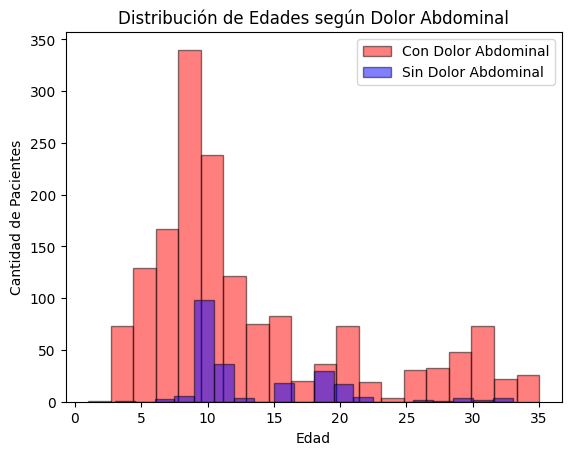

In [34]:

# Filtrar los datos de pacientes con y sin dolor abdominal
con_abdominal = df_positivos[df_positivos['Abdominal'] == 'yes']
sin_abdominal = df_positivos[df_positivos['Abdominal'] == 'no']

# Configurar los histogramas
plt.hist(con_abdominal['Age'], bins=20, edgecolor='black', color='red', alpha=0.5, label='Con Dolor Abdominal')
plt.hist(sin_abdominal['Age'], bins=20, edgecolor='black', color='blue', alpha=0.5, label='Sin Dolor Abdominal')

# Configurar etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Cantidad de Pacientes')
plt.title('Distribución de Edades según Dolor Abdominal')

# Mostrar leyenda
plt.legend()

# Mostrar gráfico
plt.show()


###Proporción de pacientes con la enfermedad celiaca según tipo de diabetes

La diabetes tipo I es una enfermedad autoinmune al igual que la enfermedad celiaca. Es bien sabido que tener una enfermedad autoinmune predispone a la existencia de más enfermedades autoinmunes. El gráfico muestra que los pacientes con diagnostico temprano de enfermedad celiaca tienen una relacion estrecha y significativa con el diagnostico de diabetes tipo I.

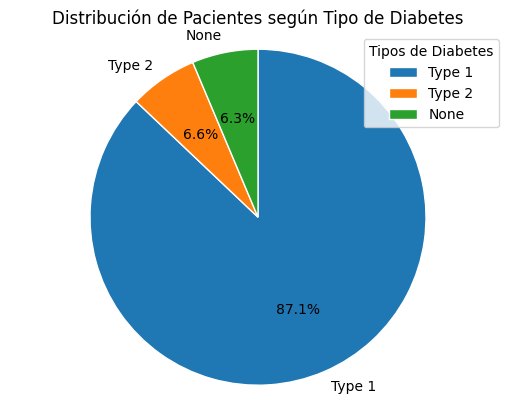

In [35]:
# Obtener los datos de tipo de diabetes (columna Diabetes Type)
diabetes_type_counts = df_positivos['Diabetes Type'].value_counts()

# Configurar el gráfico de torta
fig, ax = plt.subplots()
ax.pie(diabetes_type_counts, labels=diabetes_type_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops={'edgecolor': 'white'})

# Proporcionar título y leyenda con información adicional
ax.set_title('Distribución de Pacientes según Tipo de Diabetes')
ax.legend(diabetes_type_counts.index, title="Tipos de Diabetes", loc="upper right")

# Asegurarse de que la relación de aspecto sea igual para evitar deformaciones
ax.axis('equal')

# Mostrar el gráfico
plt.show()


###Proporción de hombres y mujeres

Las enfermedades autoinmunes suelen ser más frecuentes en mujeres, con una relacion cercana a 4:3. En el caso de estudio se observa una proporcion equivalente de distribucion de género.


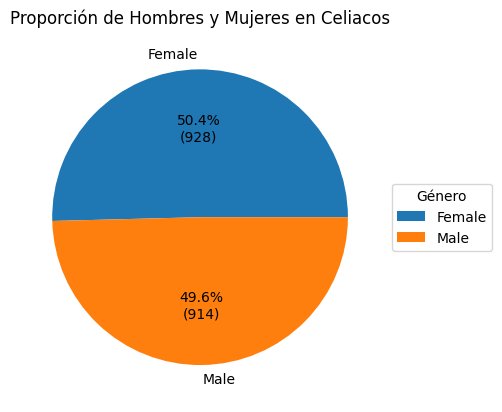

In [36]:
# Obtener los datos de género (columna Gender)
gender_counts = df_positivos['Gender'].value_counts()

# Configurar el gráfico de torta
plt.pie(gender_counts, labels=gender_counts.index, autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100*sum(gender_counts))})")
plt.title('Proporción de Hombres y Mujeres en Celiacos')
plt.legend(title='Género', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


###Distribución de Pacientes por tipo de Diarrea

La diarrea constituye uno de los síntomas típicos para el diagnóstico de la enfermedad celiaca. En los subtipos de diarrea, si bien la más esperable seria la esteatorrea (fatty) por constituir un sindrome de malabsorción, no se observan diferencias significativas en la proporcion en la muestra observada.

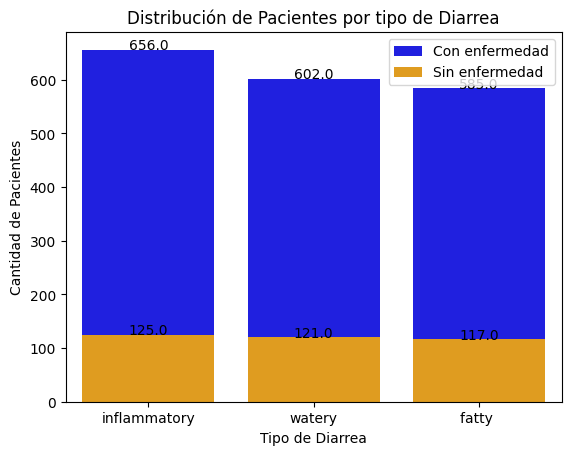

In [37]:
# Filtrar los datos de pacientes positivos y negativos
positivos = df[df['Disease_Diagnose'] == 'yes']
negativos = df[df['Disease_Diagnose'] == 'no']

# Obtener los datos de diarrea para pacientes positivos y negativos
diarrhea_counts_positivos = positivos['Diarrhoea'].value_counts()
diarrhea_counts_negativos = negativos['Diarrhoea'].value_counts()

# Configurar el gráfico de barras
ax = sns.barplot(x=diarrhea_counts_positivos.index, y=diarrhea_counts_positivos.values, color='blue', label='Con enfermedad')
sns.barplot(x=diarrhea_counts_negativos.index, y=diarrhea_counts_negativos.values, color='orange', label='Sin enfermedad')

# Agregar el valor absoluto en cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height, height, ha='center', va='baseline')

plt.xlabel('Tipo de Diarrea')
plt.ylabel('Cantidad de Pacientes')
plt.title('Distribución de Pacientes por tipo de Diarrea')
plt.legend()
plt.show()

###Relación IgG vs IgA

En el gráfico se observa que hay pacientes sin la enfermedad con anticuerpos tanto IgA cómo IgG positivos, lo que indica que la especifidad de los anticuerpos antitransglutaminasa (IgA e IgG) no es del 100%, por lo que, el diagnostico definitivo se hace por la biopsia (Clasificación de Marsh).

Se agregan lineas punteadas respecto a los valores límites normales.

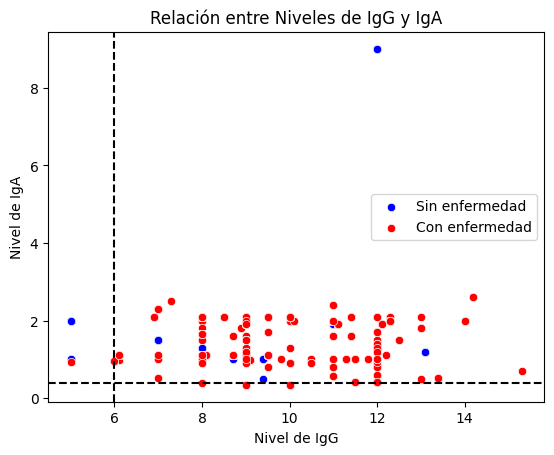

In [38]:
# Filtrar los datos de pacientes positivos y negativos
positivos = df[df['Disease_Diagnose'] == 'yes']
negativos = df[df['Disease_Diagnose'] == 'no']

# Configurar el gráfico de dispersión
sns.scatterplot(x='IgG', y='IgA', data=negativos, color='blue', label='Sin enfermedad')
sns.scatterplot(x='IgG', y='IgA', data=positivos, color='red', label='Con enfermedad')

# Agregar lineas punteadas de los valores de corte para positivo y negativo
plt.axhline(y=0.4, linestyle='dashed', color='black', linewidth=1.5)
plt.axvline(x=6, linestyle='dashed', color='black', linewidth=1.5)

plt.xlabel('Nivel de IgG')
plt.ylabel('Nivel de IgA')
plt.title('Relación entre Niveles de IgG y IgA')

plt.legend()
plt.show()

###Relacion de IgA y Marsh

El Marsh es la escala utilizada para clasificar la biopsia para el diagnostico de enfermedad celiaca, yendo de 0 para los negativos a 3c en aquellos con atrofia de las vellosidades duodenales. El grafico muestra que no necesariamente un nivel más elevado de anticuerpos indican una mayor lesión intestinal.

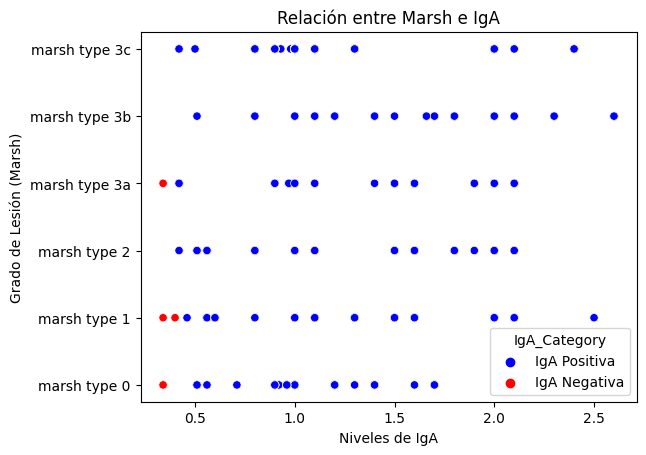

In [39]:

# Create a new column 'IgA_Category' indicating if IgA levels are greater than 0.4 or not
df['IgA_Category'] = df['IgA'].apply(lambda x: 'IgA Positiva' if x > 0.4 else 'IgA Negativa')

# Define the desired order of Marsh types
marsh_order = ['marsh type 3c', 'marsh type 3b', 'marsh type 3a', 'marsh type 2', 'marsh type 1', 'marsh type 0']

df['Marsh'] = pd.Categorical(df['Marsh'], categories=marsh_order, ordered=True)

# Scatter plot with color-coded points based on IgA categories
sns.scatterplot(y='Marsh', x='IgA', hue='IgA_Category', data=df, palette={'IgA Positiva': 'blue', 'IgA Negativa': 'red'})

# Configure labels and title
plt.ylabel('Grado de Lesión (Marsh)')
plt.xlabel('Niveles de IgA')
plt.title('Relación entre Marsh e IgA')

# Show the plot
plt.show()



###Regresion lineal IgA vs Edad al diagnostico

Después de realizar un análisis de regresión lineal entre las variables IgA y Edad, llegamos a la conclusión de que no existe una relación significativa entre ambas variables. Esto se basa en los resultados obtenidos del análisis, donde los valores de p-value y el coeficiente de determinación (R2) indican que no hay suficiente evidencia estadística para respaldar la relación lineal entre IgA y Edad.



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.195
Date:                Sat, 11 Nov 2023   Prob (F-statistic):              0.274
Time:                        13:11:21   Log-Likelihood:                -6413.2
No. Observations:                1843   AIC:                         1.283e+04
Df Residuals:                    1841   BIC:                         1.284e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7572      0.474     26.928      0.0

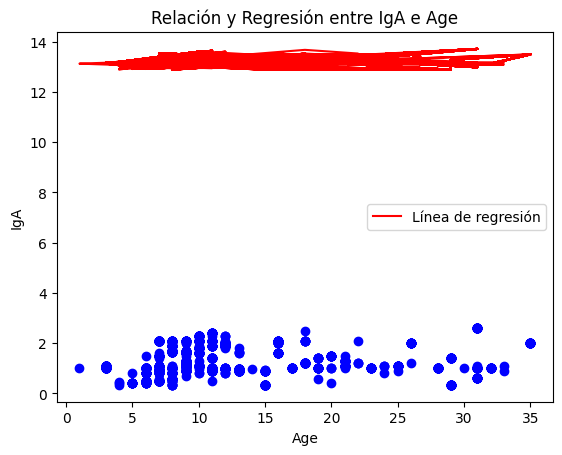

Coeficiente de determinación (R²): 0.0006489255643087333


<ipython-input-40-4f6374779bc2>:32: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_positivos.corr()


,Age,IgA,IgG,IgM
Age,1.000000,0.025474,0.114262,0.033073
IgA,0.025474,1.000000,-0.037878,0.186615
IgG,0.114262,-0.037878,1.000000,-0.139753
IgM,0.033073,0.186615,-0.139753,1.000000


In [40]:
import numpy as np
import statsmodels.api as sm

# Obtener los valores de las columnas como arreglos numpy
IgA = df_positivos['IgA'].values
Age = df_positivos['Age'].values

# Añadir una columna de unos para representar el intercepto en el modelo
X = sm.add_constant(IgA)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(Age, X)
resultado = modelo.fit()

# Obtener el coeficiente de determinación (R²)
r2 = resultado.rsquared

# Imprimir el resumen de la regresión lineal
print(resultado.summary())

# Graficar la relación entre las variables con la línea de regresión
plt.scatter(Age, IgA, color='b')
plt.plot(Age, resultado.predict(X), color='r', label='Línea de regresión')
plt.xlabel('Age')
plt.ylabel('IgA')
plt.title('Relación y Regresión entre IgA e Age')
plt.legend()
plt.show()

# Imprimir el coeficiente de determinación (R²)
print("Coeficiente de determinación (R²):", r2)
df_positivos.corr()

## Insights

### Heat Map

Con el mapa de calor volvemos a ver la baja correlación entre variables numericas.

<ipython-input-41-f492cc9208fd>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'Wistia')


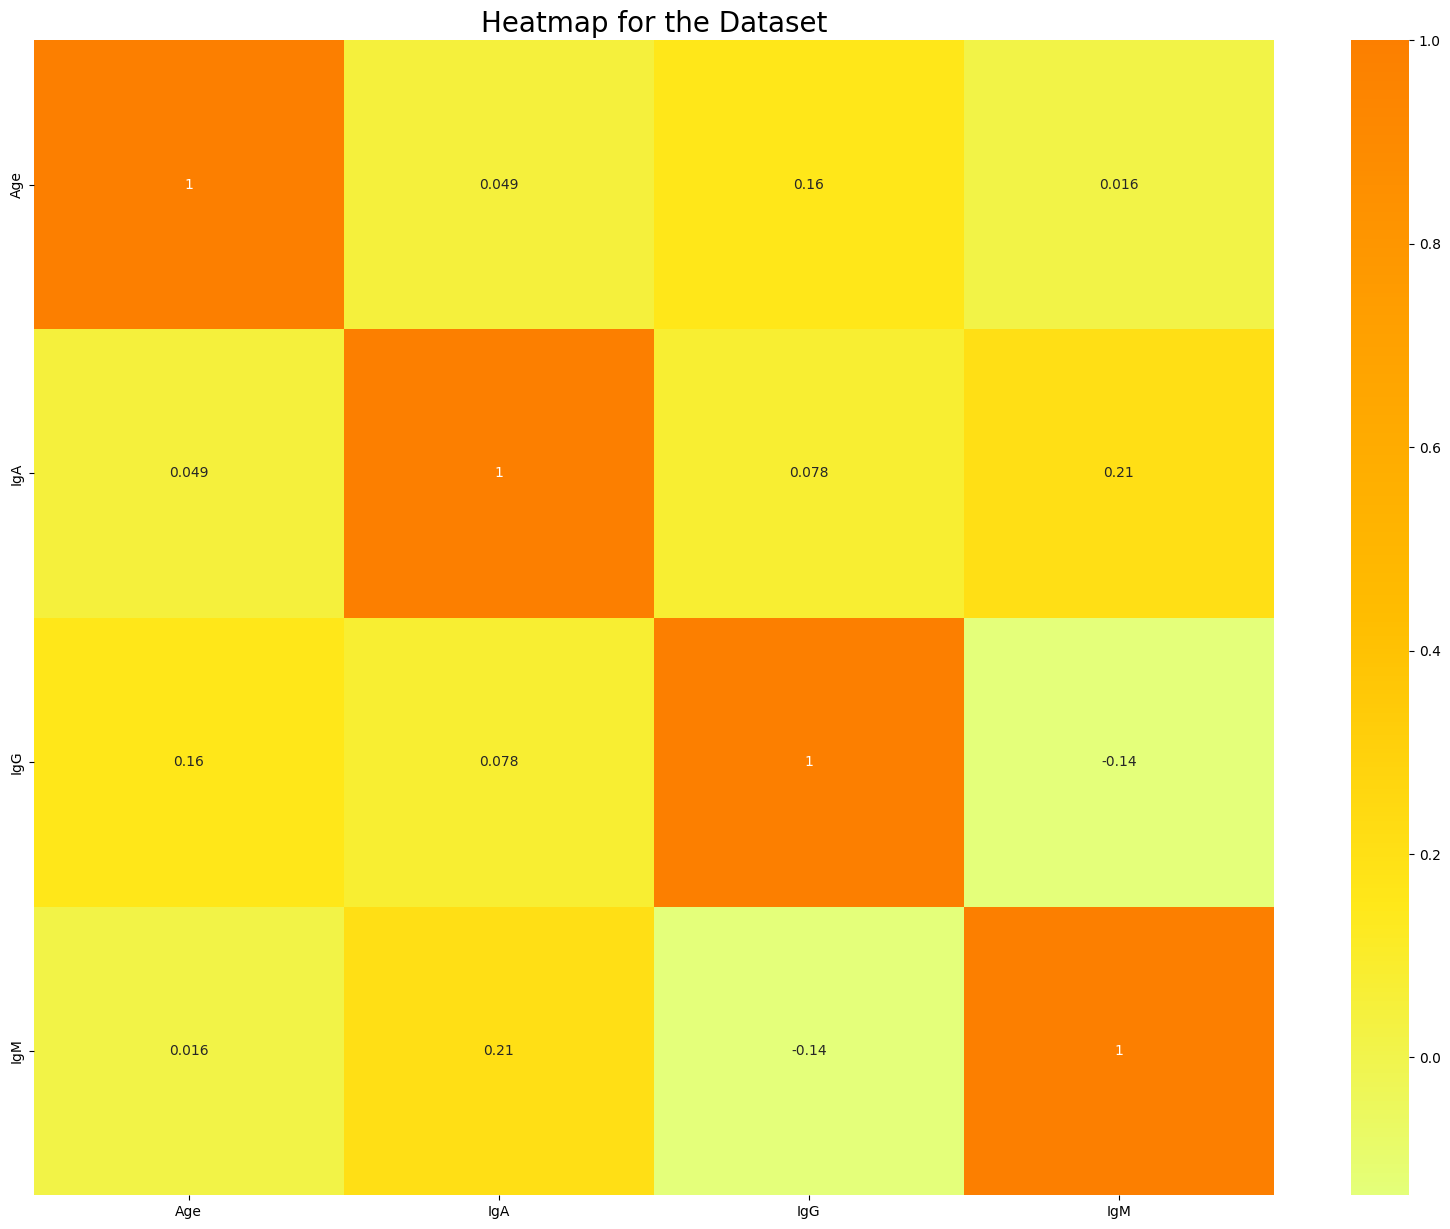

In [41]:
#Hagamos un HeatMap del df
plt.rcParams['figure.figsize'] = (20, 15)

sns.heatmap(df.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

## Data Wrangling


### Valores nulos


In [42]:
# Verificar valores faltantes por columna
print(df.isnull().sum())

Age                   0
Gender                0
Diabetes              0
Diabetes Type         0
Diarrhoea             0
Abdominal             0
Short_Stature         0
Sticky_Stool          0
Weight_loss           0
IgA                   0
IgG                   0
IgM                   0
Marsh               350
cd_type               0
Disease_Diagnose      0
IgA_Category          0
dtype: int64


In [43]:
# Rellenar los valores nulos en la columna 'Marsh' con el valor 'Not Performed'

df['Marsh'] = pd.Categorical(df['Marsh'].cat.add_categories('Not Performed'))

df['Marsh'] = df['Marsh'].fillna('Not Performed')

unique_marsh_values = df['Marsh'].unique()

print("Valores únicos en la columna 'Marsh':")
unique_marsh_values

Valores únicos en la columna 'Marsh':


['marsh type 0', 'marsh type 3a', 'marsh type 1', 'marsh type 2', 'marsh type 3b', 'Not Performed', 'marsh type 3c']
Categories (7, object): ['marsh type 3c' < 'marsh type 3b' < 'marsh type 3a' < 'marsh type 2' <
                         'marsh type 1' < 'marsh type 0' < 'Not Performed']

In [44]:
# Verificar valores faltantes por columna
print(df.isnull().sum())

Age                 0
Gender              0
Diabetes            0
Diabetes Type       0
Diarrhoea           0
Abdominal           0
Short_Stature       0
Sticky_Stool        0
Weight_loss         0
IgA                 0
IgG                 0
IgM                 0
Marsh               0
cd_type             0
Disease_Diagnose    0
IgA_Category        0
dtype: int64


### Duplicados

En el caso del dataset no hay valores duplicados, ya que se trata de una línea por paciente que no tiene un id específico. Eliminar duplicados nos haría solamente eliminar pacientes que tienen entre sí los mismos sintomas, edad, etc.

In [46]:
# Imprimir los primeros 5 registros del dataframe
df.head()



,Age,Gender,Diabetes,Diabetes Type,Diarrhoea,Abdominal,Short_Stature,Sticky_Stool,Weight_loss,IgA,IgG,IgM,Marsh,cd_type,Disease_Diagnose,IgA_Category
0,10,Male,Yes,Type 1,inflammatory,yes,PSS,no,no,1.30,10.0,1.00,marsh type 0,potential,yes,IgA Positiva
1,9,Male,Yes,Type 1,fatty,yes,PSS,no,no,1.50,12.5,1.30,marsh type 3a,atypical,yes,IgA Positiva
2,8,Female,Yes,Type 1,watery,yes,Variant,yes,yes,0.40,8.0,0.50,marsh type 1,latent,yes,IgA Negativa
3,10,Male,Yes,Type 1,watery,yes,PSS,no,no,0.98,9.0,0.66,marsh type 3a,silent,yes,IgA Positiva
4,9,Male,Yes,Type 1,fatty,yes,PSS,no,no,1.00,10.5,1.10,marsh type 1,latent,yes,IgA Positiva


In [45]:
# Ver las filas duplicadas en todo el DataFrame
print(df.duplicated().sum())

1557


### Valores Atípicos

En este caso no se consideran valores atípicos, debido a que el algoritmo elegido no necesita que se quiten.



## Encoding y Feature Engineering


In [47]:
# Variables independientes (X) y variable objetivo (y)
 #como cd_type y Marsh son diagnostico de enfermedad se sacan del modelo. Y tambien la IgA_Category que solo se usó para categorizar una variable continua
X = df.drop(['Disease_Diagnose', 'cd_type','Marsh','IgA_Category'], axis=1)
y = df['Disease_Diagnose']


# Feature Engineering de variables continuas basadas en rangos de referencia IgA
X['IgA_Level'] = pd.cut(df['IgA'], bins=[-float('inf'), 0.4, 1, float('inf')],
                                 labels=['negative', 'weak positive', 'positive'])

# Feature Engineering de variables continuas basadas en rangos de referencia IgG
X['IgG_Level'] = pd.cut(df['IgG'], bins=[-float('inf'), 6, 9, float('inf')],
                                 labels=['negative', 'weak positive', 'positive'])

# Encoding variables categóricas utilizando variables dummy
X_encoded = pd.get_dummies(X)

X_encoded

,Age,IgA,IgG,IgM,Gender_Female,Gender_Male,Diabetes_Yes,Diabetes_no,Diabetes Type_None,Diabetes Type_Type 1,...,Sticky_Stool_no,Sticky_Stool_yes,Weight_loss_no,Weight_loss_yes,IgA_Level_negative,IgA_Level_weak positive,IgA_Level_positive,IgG_Level_negative,IgG_Level_weak positive,IgG_Level_positive
0,10,1.30,10.0,1.00,0,1,1,0,0,1,...,1,0,1,0,0,0,1,0,0,1
1,9,1.50,12.5,1.30,0,1,1,0,0,1,...,1,0,1,0,0,0,1,0,0,1
2,8,0.40,8.0,0.50,1,0,1,0,0,1,...,0,1,0,1,1,0,0,0,1,0
3,10,0.98,9.0,0.66,0,1,1,0,0,1,...,1,0,1,0,0,1,0,0,1,0
4,9,1.00,10.5,1.10,0,1,1,0,0,1,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,3,1.10,7.0,0.60,0,1,1,0,0,1,...,0,1,1,0,0,0,1,0,1,0
2202,11,1.40,12.0,1.10,1,0,1,0,0,1,...,0,1,1,0,0,0,1,0,0,1
2203,15,0.34,10.0,0.60,0,1,1,0,0,1,...,0,1,1,0,1,0,0,0,0,1
2204,7,2.10,8.5,2.10,1,0,0,1,1,0,...,0,1,0,1,0,0,1,0,1,0


## Algoritmo recomendado (TPOT)




Según TPOT nos recomienda utilizar el algoritmo RandomForestClassifier como baseline de este análisis.

In [ ]:
pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=740818b94777d151790a2f47b2dbde127c9a6e9e08fa69309cb4744d18b12430
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
from tpot import TPOTClassifier


# Utilizar TPOT para buscar automáticamente el mejor modelo y configuración
tpot = TPOTClassifier(generations=10, population_size=20, verbosity=2, random_state=42)
tpot.fit(X_encoded, y)

# Imprimir el algoritmo seleccionado por TPOT
print("Algoritmo seleccionado por TPOT:")
print(tpot.fitted_pipeline_)

Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9687095350960897

Generation 2 - Current best internal CV score: 0.9687095350960897

Generation 3 - Current best internal CV score: 0.9687095350960897

Generation 4 - Current best internal CV score: 0.9687095350960897

Generation 5 - Current best internal CV score: 0.9687095350960897

Generation 6 - Current best internal CV score: 0.9687095350960897

Generation 7 - Current best internal CV score: 0.9687095350960897

Generation 8 - Current best internal CV score: 0.9687095350960897

Generation 9 - Current best internal CV score: 0.9687095350960897

Generation 10 - Current best internal CV score: 0.9687095350960897

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.55, min_samples_leaf=16, min_samples_split=9, n_estimators=100)
Algoritmo seleccionado por TPOT:
Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_features=0.55,
      

## Reducción de dimensionalidad y entrenamiento del modelo Random Forest


Luego de la selección de variables utilizando el metodo forward:

La matriz de confusión que se ha obtenido muestra los resultados de la clasificación realizada por el modelo y se organiza en forma de una matriz cuadrada con dimensiones 2x2. Cada posición de la matriz representa una combinación de la etiqueta real (verdadero positivo, verdadero negativo) y la etiqueta predicha (falso positivo, falso negativo).

- En la posición (0, 0), tenemos el número de verdaderos positivos (TP) que es 53. Esto significa que el modelo predijo correctamente que 53 muestras tienen la enfermedad celiaca (etiqueta positiva) y estas muestras realmente tienen la enfermedad celiaca.

- En la posición (0, 1), tenemos el número de falsos negativos (FN), que es 20. Esto significa que el modelo predijo incorrectamente 20 muestras como negativa cuando en realidad tenían la enfermedad celiaca.

- En la posición (1, 0), tenemos el número de falsos positivos (FP), que es 0. Esto significa que el modelo no predijo incorrectamente ninguna muestras como positivas cuando en realidad no tenían la enfermedad celiaca.

- En la posición (1, 1), tenemos el número de verdaderos negativos (TN), que es 369. Esto significa que el modelo predijo correctamente que 369 muestras no tienen la enfermedad celiaca (etiqueta negativa) y estas muestras realmente no tienen la enfermedad celiaca.

Métricas en el conjunto de entrenamiento:

* Exactitud: 97.28%
* Precisión: 96.91%
* Sensibilidad (Recall): 99.93%
* Especificidad: 83.79%
* F1-Score: 98.40%


Métricas en el conjunto de prueba:

* Exactitud: 95.48%
* Precisión: 94.86%
* Sensibilidad (Recall): 100%
* Especificidad: 72.60%
* F1-Score: 97.36%

La comparación entre las metricas indicaría que no hay evidencia de overfitting.

Métricas en el conjunto de entrenamiento:
Exactitud: 0.9727891156462585
Precisión: 0.969078947368421
Sensibilidad (Recall): 0.9993215739484396
Especificidad: 0.8379310344827586
F1-Score: 0.9839679358717435

-----------

Métricas en el conjunto de prueba:
Exactitud: 0.9547511312217195
Precisión: 0.9485861182519281
Sensibilidad (Recall): 1.0
Especificidad: 0.726027397260274
F1-Score: 0.9736147757255937

-----------

Características seleccionadas:
Age
IgA
IgG
IgM
Gender_Female
Gender_Male
Diabetes_Yes
Diabetes_no
Diabetes Type_None
Diabetes Type_Type 1

-----------

Matriz de Confusión:
[[ 53  20]
 [  0 369]]

-----------



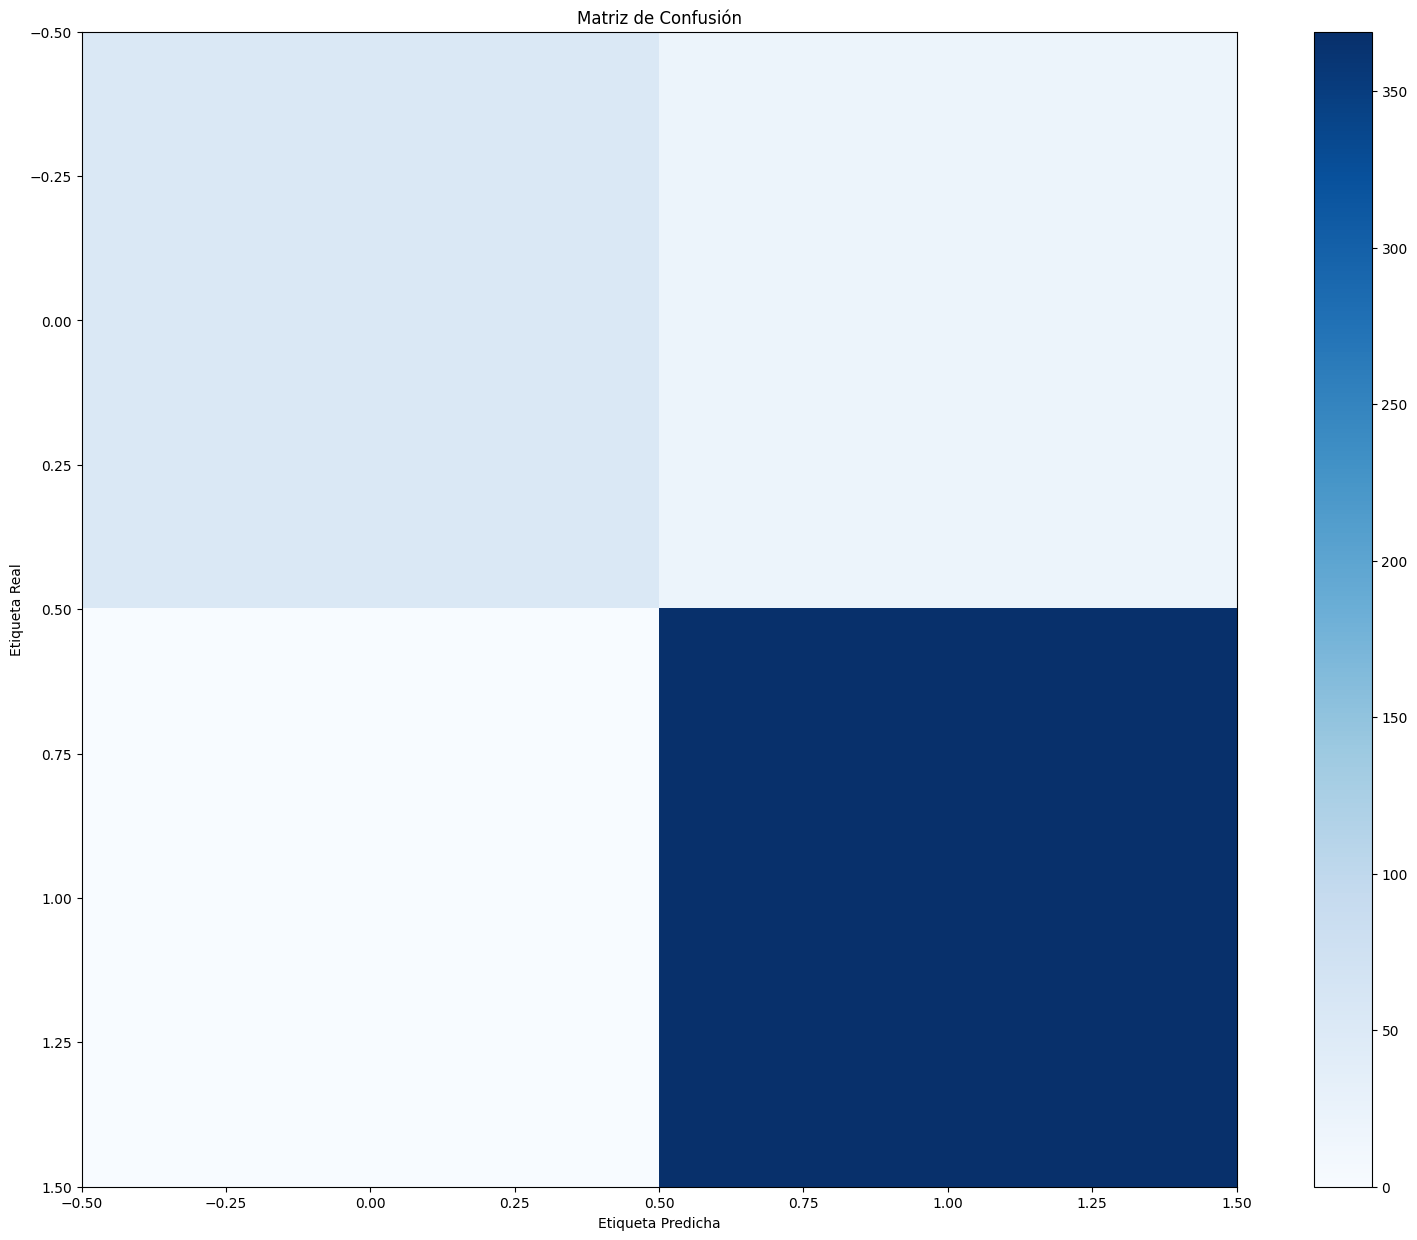


-----------



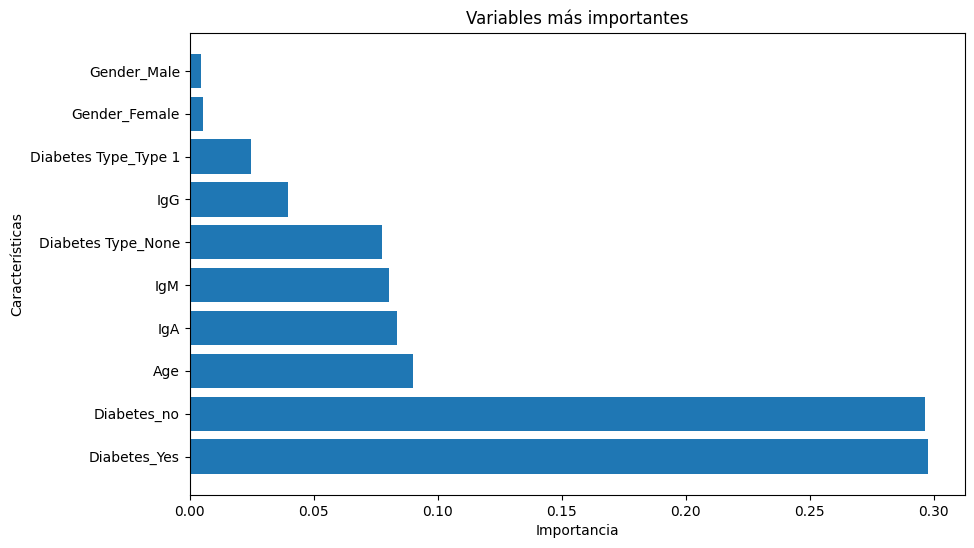

In [ ]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Escalar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reducción de dimensionalidad utilizando Sequential Feature Selector (forward)
selector = SequentialFeatureSelector(RandomForestClassifier(criterion='entropy', max_features=0.55,
                                          min_samples_leaf=16,
                                          min_samples_split=9,
                                          random_state=42),
                                          n_features_to_select=10,
                                     direction='forward')
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Obtener el nombre de las características seleccionadas
selected_features = X_encoded.columns[selector.get_support()]

# Crear y ajustar el modelo de clasificación (Random Forest)
modelo = RandomForestClassifier(criterion='entropy',
                                max_features=0.55,
                                min_samples_leaf=16,
                                min_samples_split=9,
                                random_state=42)
modelo.fit(X_train_selected, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_train = modelo.predict(X_train_selected)
y_pred_test = modelo.predict(X_test_selected)

# Calcular las métricas de evaluación en el conjunto de entrenamiento
exactitud_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, pos_label='yes')
sensibilidad_train = recall_score(y_train, y_pred_train, pos_label='yes')
especificidad_train = recall_score(y_train, y_pred_train, pos_label='no')
f1_train = f1_score(y_train, y_pred_train, pos_label='yes')

# Calcular las métricas de evaluación en el conjunto de prueba
exactitud_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, pos_label='yes')
sensibilidad_test = recall_score(y_test, y_pred_test, pos_label='yes')
especificidad_test = recall_score(y_test, y_pred_test, pos_label='no')
f1_test = f1_score(y_test, y_pred_test, pos_label='yes')

# Crear matriz de confusión en el conjunto de prueba
matriz_confusion = confusion_matrix(y_test, y_pred_test)

# Imprimir las métricas de evaluación en el conjunto de entrenamiento
print("Métricas en el conjunto de entrenamiento:")
print("Exactitud:", exactitud_train)
print("Precisión:", precision_train)
print("Sensibilidad (Recall):", sensibilidad_train)
print("Especificidad:", especificidad_train)
print("F1-Score:", f1_train)
print("\n-----------\n")

# Imprimir las métricas de evaluación en el conjunto de prueba
print("Métricas en el conjunto de prueba:")
print("Exactitud:", exactitud_test)
print("Precisión:", precision_test)
print("Sensibilidad (Recall):", sensibilidad_test)
print("Especificidad:", especificidad_test)
print("F1-Score:", f1_test)
print("\n-----------\n")

# Imprimir las características seleccionadas
print("Características seleccionadas:")
for feature in selected_features:
    print(feature)
print("\n-----------\n")

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(matriz_confusion)
print("\n-----------\n")

# Graficar la matriz de confusión
plt.imshow(matriz_confusion, cmap='Blues')
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()
print("\n-----------\n")


# Obtener la importancia de las características del modelo
feature_importance = modelo.feature_importances_

# Crear un DataFrame con los nombres de las características y sus importancias
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importance})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Graficar las variables más importantes
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Variables más importantes')
plt.show()

## Reducción de dimensionalidad y entrenamiento del modelo Decision Tree Classifier





Al utilizar todas las variables en lugar de las seleccionadas por el metodo forward, obtenemos:


- En la posición (0, 0), tenemos el número de verdaderos positivos (TP) que es 53. Esto significa que el modelo predijo correctamente que 53 muestras tienen la enfermedad celiaca (etiqueta positiva) y estas muestras realmente tienen la enfermedad celiaca.

- En la posición (0, 1), tenemos el número de falsos negativos (FN), que es 20. Esto significa que el modelo predijo incorrectamente 20 muestras como negativa cuando en realidad tenían la enfermedad celiaca.

- En la posición (1, 0), tenemos el número de falsos positivos (FP), que es 0. Esto significa que el modelo no predijo incorrectamente ninguna muestras como positivas cuando en realidad no tenían la enfermedad celiaca.

- En la posición (1, 1), tenemos el número de verdaderos negativos (TN), que es 369. Esto significa que el modelo predijo correctamente que 369 muestras no tienen la enfermedad celiaca (etiqueta negativa) y estas muestras realmente no tienen la enfermedad celiaca.

Métricas en el conjunto de entrenamiento:

* Exactitud: 97.39%
* Precisión: 96,97%
* Sensibilidad (Recall): 100%
* Especificidad: 84.13%
* F1-Score: 98.46%


Métricas en el conjunto de prueba:

* Exactitud: 95.47%
* Precisión: 94.85%
* Sensibilidad (Recall): 100%
* Especificidad: 72.6%
* F1-Score: 97.36%


La comparación entre las metricas indicaría que no hay evidencia de overfitting.

En general, ambas versiones del modelo parecen funcionar bien y tienen un rendimiento similar en términos de métricas de evaluación.

Métricas en el conjunto de entrenamiento:
Exactitud: 0.9739229024943311
Precisión: 0.9697368421052631
Sensibilidad (Recall): 1.0
Especificidad: 0.8413793103448276
F1-Score: 0.9846359385437542

-----------

Métricas en el conjunto de prueba:
Exactitud: 0.9547511312217195
Precisión: 0.9485861182519281
Sensibilidad (Recall): 1.0
Especificidad: 0.726027397260274
F1-Score: 0.9736147757255937

-----------

Características seleccionadas:
IgA
Gender_Female
Gender_Male
Diabetes_Yes
Diabetes_no
Diabetes Type_None
Diabetes Type_Type 1
Diabetes Type_Type 2
Diarrhoea_fatty 
IgG_Level_negative

-----------

Matriz de Confusión:
[[ 53  20]
 [  0 369]]

-----------



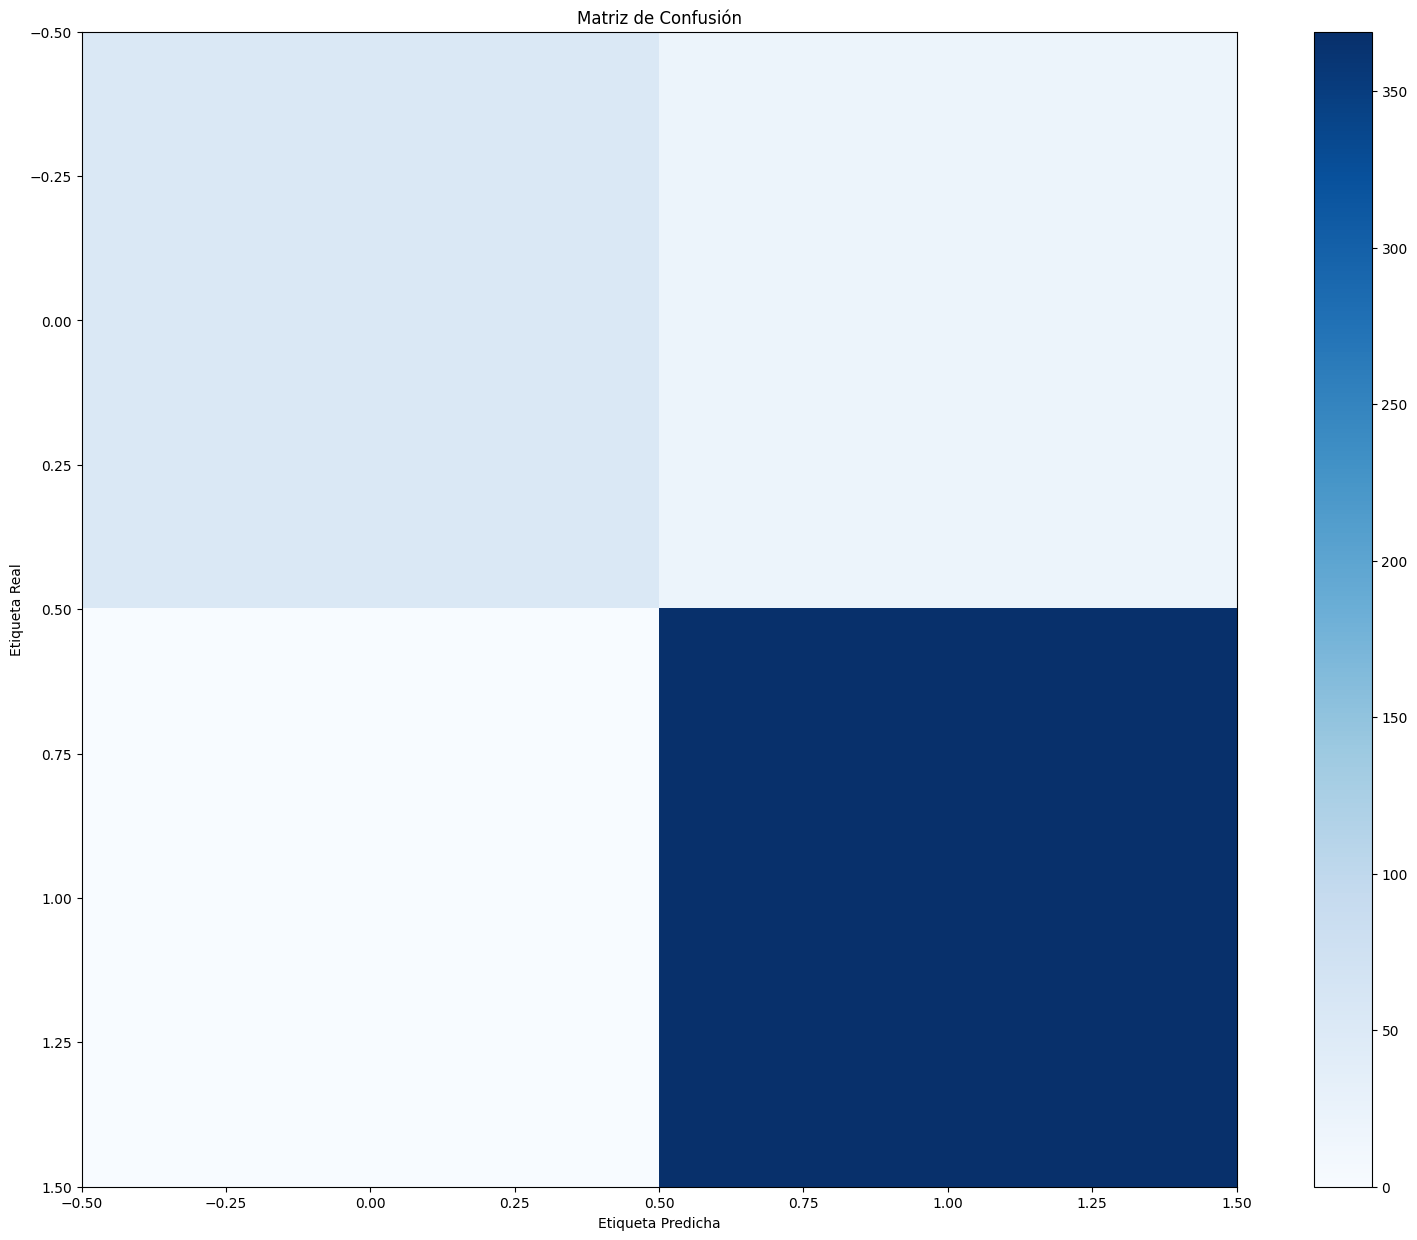


-----------



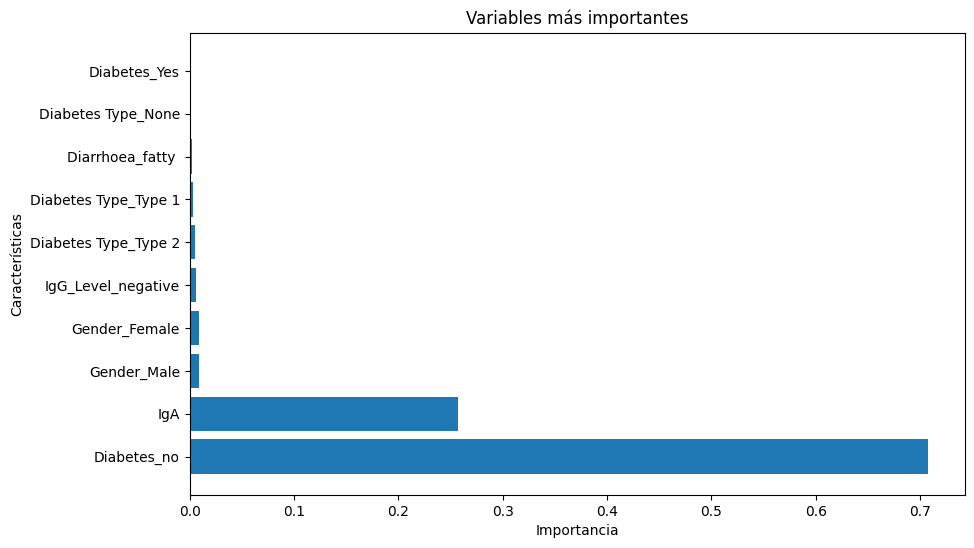

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Escalar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reducción de dimensionalidad utilizando Sequential Feature Selector (forward)
selector = SequentialFeatureSelector(DecisionTreeClassifier(criterion='entropy',
                                                            max_depth=10,
                                                            min_samples_split=5,
                                                            random_state=42),
                                     n_features_to_select=10,
                                     direction='forward')
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Obtener el nombre de las características seleccionadas
selected_features = X_encoded.columns[selector.get_support()]

# Crear y ajustar el modelo de clasificación (Árbol de Decisión)
modelo = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5, random_state=42)
modelo.fit(X_train_selected, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_train = modelo.predict(X_train_selected)
y_pred_test = modelo.predict(X_test_selected)

# Calcular las métricas de evaluación en el conjunto de entrenamiento
exactitud_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, pos_label='yes')
sensibilidad_train = recall_score(y_train, y_pred_train, pos_label='yes')
especificidad_train = recall_score(y_train, y_pred_train, pos_label='no')
f1_train = f1_score(y_train, y_pred_train, pos_label='yes')

# Calcular las métricas de evaluación en el conjunto de prueba
exactitud_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, pos_label='yes')
sensibilidad_test = recall_score(y_test, y_pred_test, pos_label='yes')
especificidad_test = recall_score(y_test, y_pred_test, pos_label='no')
f1_test = f1_score(y_test, y_pred_test, pos_label='yes')

# Crear matriz de confusión en el conjunto de prueba
matriz_confusion = confusion_matrix(y_test, y_pred_test)

# Imprimir las métricas de evaluación en el conjunto de entrenamiento
print("Métricas en el conjunto de entrenamiento:")
print("Exactitud:", exactitud_train)
print("Precisión:", precision_train)
print("Sensibilidad (Recall):", sensibilidad_train)
print("Especificidad:", especificidad_train)
print("F1-Score:", f1_train)
print("\n-----------\n")

# Imprimir las métricas de evaluación en el conjunto de prueba
print("Métricas en el conjunto de prueba:")
print("Exactitud:", exactitud_test)
print("Precisión:", precision_test)
print("Sensibilidad (Recall):", sensibilidad_test)
print("Especificidad:", especificidad_test)
print("F1-Score:", f1_test)
print("\n-----------\n")

# Imprimir las características seleccionadas
print("Características seleccionadas:")
for feature in selected_features:
    print(feature)
print("\n-----------\n")

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(matriz_confusion)
print("\n-----------\n")

# Graficar la matriz de confusión
plt.imshow(matriz_confusion, cmap='Blues')
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()
print("\n-----------\n")


# Obtener la importancia de las características del modelo
feature_importance = modelo.feature_importances_

# Crear un DataFrame con los nombres de las características y sus importancias
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importance})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Graficar las variables más importantes
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Variables más importantes')
plt.show()


##Cross Validation de los Modelos


Basándonos en los resultados de la validación cruzada, podemos sacar algunas conclusiones:

La exactitud promedio del modelo Decision Tree Classifier es de 0.9623, lo que indica que el modelo clasifica correctamente el 96.23%

La exactitud promedio del modelo Random Forest es de 0.9691, lo que indica que el modelo clasifica correctamente el 96.91%

Además, la desviación estándar de las puntuaciones es es baja lo que significa que el funcionamiento es consistente a lo largo de las iteraciones. Aunque más baja para el Random Forest.

Como las exactitudes en cada iteración son cercanas entre sí podemos decir que el modelo es estable y generaliza bien en diferentes subdivisiones de los datos.

En resumen, los resultados indican que los modelos tienen un rendimiento sólido y estable en la predicción de la enfermedad en este conjunto de datos en particular.

Decision Tree Classifier

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score


# Define el número de splits
num_folds = 5

# Definir el procedimiento LOOCV
skf = StratifiedKFold(n_splits=num_folds, random_state=42, shuffle=True)

cv_scores = []

for train_index, test_index in skf.split(X_encoded, y):
    X_train_k = X_encoded.iloc[train_index]
    X_test_k = X_encoded.iloc[test_index]
    y_train_k, y_test_k = y[train_index], y[test_index]

    # Crear y ajustar el modelo de clasificación (Random Forest)
    modelo = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5, random_state=42)
    modelo.fit(X_train_k, y_train_k)

    # Realizar predicciones en el conjunto de prueba
    y_pred_k = modelo.predict(X_test_k)

    # Calcular la exactitud en cada fold y almacenarla en cv_scores
    accuracy = accuracy_score(y_test_k, y_pred_k)
    cv_scores.append(accuracy)

# Calcular la media y desviación estándar de las puntuaciones de validación cruzada
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)

# Imprimir los resultados
print("Resultados de la validación cruzada:")
print("Puntuaciones de cada fold:", cv_scores)
print("Exactitud promedio:", mean_accuracy)
print("Desviación estándar de las puntuaciones:", std_accuracy)








Resultados de la validación cruzada:
Puntuaciones de cada fold: [0.9615384615384616, 0.9795918367346939, 0.9682539682539683, 0.9501133786848073, 0.9523809523809523]
Exactitud promedio: 0.9623757195185767
Desviación estándar de las puntuaciones: 0.010788047774999419


Random Forest

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score


# Define el número de splits
num_folds = 5

# Definir el procedimiento LOOCV
skf = StratifiedKFold(n_splits=num_folds, random_state=42, shuffle=True)

cv_scores = []

for train_index, test_index in skf.split(X_encoded, y):
    X_train_k = X_encoded.iloc[train_index]
    X_test_k = X_encoded.iloc[test_index]
    y_train_k, y_test_k = y[train_index], y[test_index]

    # Crear y ajustar el modelo de clasificación (Random Forest)
    modelo = RandomForestClassifier(criterion='entropy',
                                max_features=0.55,
                                min_samples_leaf=16,
                                min_samples_split=9,
                                random_state=42)
    modelo.fit(X_train_k, y_train_k)

    # Realizar predicciones en el conjunto de prueba
    y_pred_k = modelo.predict(X_test_k)

    # Calcular la exactitud en cada fold y almacenarla en cv_scores
    accuracy = accuracy_score(y_test_k, y_pred_k)
    cv_scores.append(accuracy)

# Calcular la media y desviación estándar de las puntuaciones de validación cruzada
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)

# Imprimir los resultados
print("Resultados de la validación cruzada:")
print("Puntuaciones de cada fold:", cv_scores)
print("Exactitud promedio:", mean_accuracy)
print("Desviación estándar de las puntuaciones:", std_accuracy)

Resultados de la validación cruzada:
Puntuaciones de cada fold: [0.9705882352941176, 0.981859410430839, 0.9682539682539683, 0.9591836734693877, 0.9659863945578231]
Exactitud promedio: 0.9691743364012272
Desviación estándar de las puntuaciones: 0.007399102780163232


## Elección del Algorítmo

Anteriormente se entrenaron dos algoritmos de clasificación, ambos con buenos resultados desde el punto de vista de las métricas de comparación.

En este caso se elegirá el algoritmo Random Forest debido que luego de la validación cruzada da mejores resultados


Random Forest:

    Métricas en el conjunto de entrenamiento:

    Exactitud: 97.28%
    Precisión: 96.91%
    Sensibilidad (Recall): 99.93%
    Especificidad: 83.79%
    F1-Score: 98.40%

    Métricas en el conjunto de prueba:

    Exactitud: 95.48%
    Precisión: 94.86%
    Sensibilidad (Recall): 100%
    Especificidad: 72.60%
    F1-Score: 97.36%
    
    Matriz de Confusión:
    [ 53  20]
    [  0 369]

    Resultados de la validación cruzada:
    Puntuaciones de cada fold: [0.9705, 0.9818, 0.9682, 0.9591, 0.9659]
    Exactitud promedio: 0.9691
    Desviación estándar de las puntuaciones: 0.0074

Decision Tree Classifier:

    Métricas en el conjunto de entrenamiento:

    Exactitud: 97.39%
    Precisión: 96,97%
    Sensibilidad (Recall): 100%
    Especificidad: 84.13%
    F1-Score: 98.46%
    Métricas en el conjunto de prueba:

    Exactitud: 95.47%
    Precisión: 94.85%
    Sensibilidad (Recall): 100%
    Especificidad: 72.6%
    F1-Score: 97.36%

    Matriz de Confusión:
    [ 53  20]
    [  0 369]

    Resultados de la validación cruzada:
    Puntuaciones de cada fold: [0.9615, 0.9795, 0.9682, 0.9501, 0.9523]
    Exactitud promedio: 0.9623
    Desviación estándar de las puntuaciones: 0.01


##Optimización de hiperparámetros

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Escalar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reducción de dimensionalidad utilizando Sequential Feature Selector (forward)
selector = SequentialFeatureSelector(RandomForestClassifier(criterion='entropy', max_features=0.55,
                                          min_samples_leaf=16,
                                          min_samples_split=9,
                                          random_state=42),
                                          n_features_to_select=10,
                                     direction='forward')
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Definir los hiperparámetros a ajustar
param_grid = {
    'max_features': [0.5, 0.55, 0.6],
    'min_samples_split': [8, 9, 10, 12],
    'min_samples_leaf': [15, 16, 17, 18]
}

# Crear un modelo de Random Forest Classifier con los hiperparámetros iniciales dados
rf = RandomForestClassifier(criterion='entropy', max_features=0.55, min_samples_leaf=16, min_samples_split=9, random_state=42)

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Ajustar el modelo en los datos de entrenamiento
grid_search.fit(X_train_selected, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba y test
y_pred_train = best_model.predict(X_train_selected)
y_pred_test = best_model.predict(X_test_selected)

# Calcular las métricas de evaluación en el conjunto de prueba
exactitud_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, pos_label='yes')
sensibilidad_test = recall_score(y_test, y_pred_test, pos_label='yes')
especificidad_test = recall_score(y_test, y_pred_test, pos_label='no')
f1_test = f1_score(y_test, y_pred_test, pos_label='yes')

# Imprimir las métricas de evaluación en el conjunto de prueba con el mejor modelo
print("Métricas en el conjunto de prueba con el mejor modelo:")
print("Exactitud:", exactitud_test)
print("Precisión:", precision_test)
print("Sensibilidad (Recall):", sensibilidad_test)
print("Especificidad:", especificidad_test)
print("F1-Score:", f1_test)

Mejores parámetros: {'max_features': 0.5, 'min_samples_leaf': 15, 'min_samples_split': 8}
Métricas en el conjunto de prueba con el mejor modelo:
Exactitud: 0.9547511312217195
Precisión: 0.9485861182519281
Sensibilidad (Recall): 1.0
Especificidad: 0.726027397260274
F1-Score: 0.9736147757255937


#Data StoryTelling

¿Cómo puede predecirse la incidencia de la enfermedad celíaca a partir de los síntomas presentados por el paciente?


En la actualidad, la enfermedad celíaca, una condición autoinmune caracterizada por la intolerancia al gluten, está en constante aumento en la Argentina. El diagnóstico temprano y preciso es esencial, y es aquí donde la ciencia y la tecnología se deben unir para lograr mejorar la vida de los pacientes.

El estudio comienza con la recopilación de un conjunto de datos detallado que incluye pacientes entre 1 y 35 años. Se utilizaron herramientas gráficas y análisis de regresión lineal multivariada para explorar patrones y relaciones.

Los resultados revelaron que los pacientes diagnosticados con síntomas típicos desde la infancia, especialmente si padecían diabetes tipo I en simultáneo, presentaban una incidencia más alta de enfermedad celíaca. De hecho la diabetes se selecciona como una de las variables más importantes dentro del conjunto de datos.

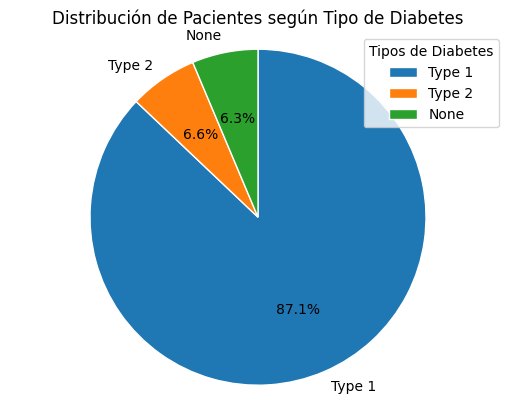


El género no parece influir en la misma medida, desafiando las expectativas basadas en otras enfermedades autoinmunes. Además, aunque la diarrea se considera un síntoma clave, su relación directa con la enfermedad celíaca no fue definitiva como podía esperarse. Los anticuerpos siguen siendo indicadores esenciales, aunque no irrefutables, para la predicción.

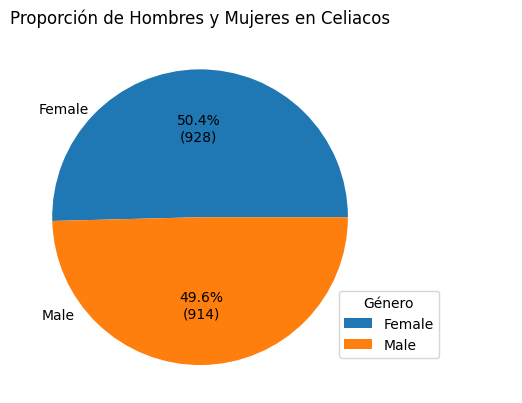

Esta investigación es motivada por la mejora de la calidad de vida de los pacientes. El objetivo primordial es predecir el diagnóstico, permitiendo a los individuos sanos evitar procedimientos invasivos. Además, la detección temprana podría mejorar el manejo de la enfermedad y brindar oportunidades para un enfoque preventivo.

Los resultados son alentadores. Se descubrió que utilizando técnicas de aprendizaje automático, es posible predecir con una precisión del 95.47% si alguien tiene la enfermedad celíaca. Esta innovación tiene el potencial de revolucionar el panorama médico, abriendo la puerta a diagnósticos más precisos y tratamientos más efectivos.

Además, en el ámbito comercial, esta predicción precisa podría tener un impacto sustancial. La disminución de estudios innecesarios y la reducción del riesgo asociado a procedimientos invasivos pueden mejorar el bienestar de los pacientes y reducir costos.
